# ML Homework2 Question 5

In [207]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import scipy.optimize as optimize
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import jaccard_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [190]:
df = pd.read_csv('Stress-Lysis.csv')
df

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,mid
1,21.41,90.41,93,mid
2,27.12,96.12,196,high
3,27.64,96.64,177,high
4,10.87,79.87,87,low
...,...,...,...,...
1996,21.82,90.82,96,mid
1997,10.45,79.45,45,low
1998,27.22,96.22,135,high
1999,12.46,81.46,64,low


## 

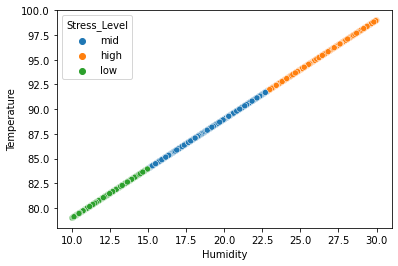

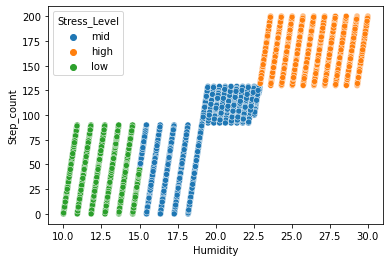

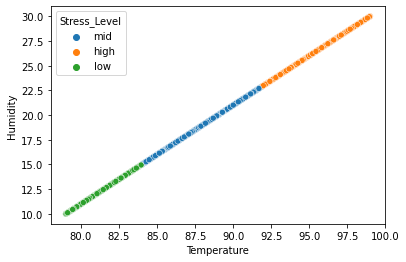

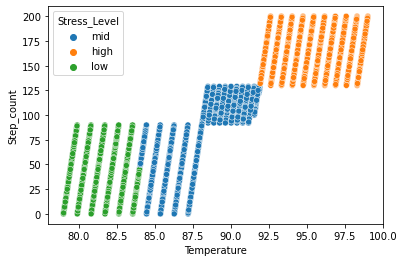

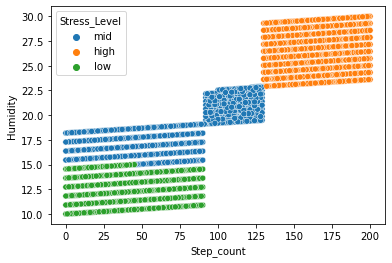

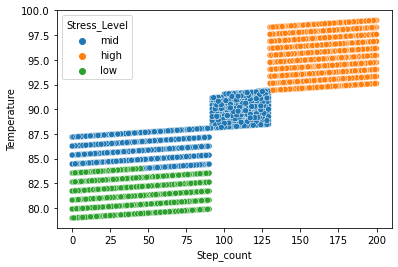

In [191]:
cols = list(df.columns)
i=1
for coli in cols[:3]:
    for colj in cols[:3]:
        if coli != colj:
            i += 1 
            plt.figure(i)
            sns.scatterplot(data=df, x=coli, y=colj, hue='Stress_Level')


In [196]:
class LogisticRegression(object):
    
    def __init__(Logreg, alpha=0.01, n_iteration=100):  #This function intializes the alpha value and iteration 
        Logreg.alpha = alpha                            #value in the object
        Logreg.n_iter = n_iteration
        
    def _sigmoid_function(Logreg, x): #This function is resonsible for calculating the sigmoid value with given parameter
        value = 1 / (1 + np.exp(-x))
        return value
    def _cost_function(Logreg,h,theta, y): # The fuctions calculates the cost value
        m = len(y)
        cost = (1 / m) * (np.sum(-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))))
        return cost
    
    def _gradient_descent(Logreg,X,h,theta,y,m): # This function calculates the theta value by gradient descent
        gradient_value = np.dot(X.T, (h - y)) / m
        theta -= Logreg.alpha * gradient_value
        return theta
    
    def fit(Logreg, X, y): #This function primarily calculates the optimal theta value using which we predict the future data
        print("Fitting the given dataset..")
        Logreg.theta = []
        Logreg.cost = []
        X = np.insert(X, 0, 1, axis=1)
        m = len(y)
        for i in np.unique(y): 
            #print('Descending the gradient for label type ' + str(i) + 'vs Rest')
            y_onevsall = np.where(y == i, 1, 0)
            theta = np.zeros(X.shape[1])
            cost = []
            for _ in range(Logreg.n_iter):
                z = X.dot(theta)
                h = Logreg._sigmoid_function(z)
                theta = Logreg._gradient_descent(X,h,theta,y_onevsall,m)
                cost.append(Logreg._cost_function(h,theta,y_onevsall)) 
            Logreg.theta.append((theta, i))
            Logreg.cost.append((cost,i))
        return Logreg

    def predict(Logreg, X): # this function calls the max predict function to classify the individul feauter
        X = np.insert(X, 0, 1, axis=1)
        X_predicted = [max((Logreg._sigmoid_function(i.dot(theta)), c) for theta, c in Logreg.theta)[1] for i in X ]

        return X_predicted

    def score(Logreg,X, y): #This function compares the predictd label with the actual label to find the model performance
        score = sum(Logreg.predict(X) == y) / len(y)
        return score
    
    def conf_mtx(Logreg,X, y):
        y_actu = pd.Series(y, name='Actual')
        y_pred = pd.Series(Logreg.predict(X), name='Predicted')
        confusion = pd.crosstab(y_actu, y_pred)
        return confusion
    
    def jaccard(Logreg,X, y):
        classes = set(y)
        jacc_arr = []
        for c in classes:
            actu = [i for i, x in enumerate(y) if x == c]
            pred = [i for i, x in enumerate(Logreg.predict(X)) if x == c]
            intersection = len(list(set(actu).intersection(pred)))
            union = (len(set(actu)) + len(set(pred))) - intersection
            jacc = float(intersection) / union
            jacc_arr.append(jacc)
        return jacc_arr
    
    def _plot_cost(Logreg,costh): # This function plot the Cost function value
        for cost,c in costh   :
                plt.plot(range(len(cost)),cost,'r')
                plt.title("Convergence Graph of Cost Function of type-" + str(c) +" vs All")
                plt.xlabel("Number of Iterations")
                plt.ylabel("Cost")
                plt.show()

In [193]:
data = df

y_data = data_T['Stress_Level'].values  #segregating the label vlue from the feature value.
X = data_T.drop(['Stress_Level'],axis=1).values

scaler = StandardScaler()
X= scaler.fit_transform(X)
print(X)

[[ 0.23024766  0.23024766  0.39297226]
 [ 0.24409715  0.24409715 -0.12277161]
 [ 1.23260403  1.23260403  1.64794901]
 ...
 [ 1.24991588  1.24991588  0.59926981]
 [-1.30531382 -1.30531382 -0.62132402]
 [-0.54186104 -0.54186104 -0.86200449]]


In [197]:
from sklearn.model_selection import train_test_split
scores = []
for _ in range (10):
    X_train,X_test,y_train,y_test = train_test_split(X,y_data,test_size = 0.33)
    print("=================================================")
    logi = LogisticRegression(n_iteration=30000).fit(X_train, y_train)
    predition1 = logi.predict(X_test)
    score1 = logi.score(X_test,y_test)
    conf_mtx = logi.conf_mtx(X_test,y_test)
    jac = logi.jaccard(X_test,y_test)
    print("\n the accuracy of the model is ",score1)
    print("Confusion matrix is: \n", conf_mtx)
    print("Jacard Similarity Score is: ", jac)
    scores.append(score1)
    
print("Mean Accuracy is: ", np.mean(scores))


Fitting the given dataset..

 the accuracy of the model is  0.9470499243570348
Confusion matrix is: 
 Predicted  high  low  mid
Actual                   
high        228    0    0
low           0  168   15
mid           7   13  230
Jacard Similarity Score is:  [0.8571428571428571, 0.8679245283018868, 0.9702127659574468]
Fitting the given dataset..

 the accuracy of the model is  0.9409984871406959
Confusion matrix is: 
 Predicted  high  low  mid
Actual                   
high        219    0    0
low           0  157   14
mid           7   18  246
Jacard Similarity Score is:  [0.8306878306878307, 0.8631578947368421, 0.9690265486725663]
Fitting the given dataset..

 the accuracy of the model is  0.9531013615733737
Confusion matrix is: 
 Predicted  high  low  mid
Actual                   
high        244    0    0
low           0  152   19
mid           3    9  234
Jacard Similarity Score is:  [0.8444444444444444, 0.8830188679245283, 0.9878542510121457]
Fitting the given dataset..

 the 

In [210]:
clf = LogisticRegression(random_state=0, multi_class='ovr').fit(X, y)
prediction = clf.predict(X_test)
   
# Evaluating the model
print(f"Test Set Accuracy : {accuracy_score(y_test, prediction) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report(y_test, prediction)}")
print(f"Jaccard Report : \n\n{jaccard_score(y_test, prediction, average=None)}")
print(f"Confusion Report : \n\n{confusion_matrix(y_test, prediction)}")

Test Set Accuracy : 98.63842662632375 %


Classification Report : 

              precision    recall  f1-score   support

        high       0.99      1.00      1.00       246
         low       1.00      0.95      0.98       155
         mid       0.97      0.99      0.98       260

    accuracy                           0.99       661
   macro avg       0.99      0.98      0.99       661
weighted avg       0.99      0.99      0.99       661

Jaccard Report : 

[0.99193548 0.95483871 0.96629213]
Confusion Report : 

[[246   0   0]
 [  0 148   7]
 [  2   0 258]]
